In [42]:
import pathlib
import pandas as pd

In [52]:
df = pd.read_csv(pathlib.Path().resolve().parent.as_posix() + '/data/raw/sample.csv')
df

,x,y,class
0,2.487,2.762,1
1,2.970,1.991,1
2,3.589,2.624,1
3,4.140,2.679,1
4,3.105,2.789,1
...,...,...,...
244,5.000,15.652,1
245,3.804,14.193,1
246,2.970,16.066,1
247,4.677,16.203,1


In [53]:
df

,x,y,class
0,2.487,2.762,1
1,2.970,1.991,1
2,3.589,2.624,1
3,4.140,2.679,1
4,3.105,2.789,1
...,...,...,...
244,5.000,15.652,1
245,3.804,14.193,1
246,2.970,16.066,1
247,4.677,16.203,1


### Z-score (Univariate)

In [69]:
upper_limit = df['x'].mean() + 3 * df['x'].std()
lower_limit = df['x'].mean() - 3 * df['x'].std()

print('Mean: ', df['x'].mean())
print('Std: ', df['x'].std())
print(f'Upper Limit : {upper_limit}\nLower Limit: {lower_limit}')
print('Min: ', df['x'].min())
print('Max: ', df['x'].max())

Mean:  10.292618473895583
Std:  4.935583032835348
Upper Limit : 25.099367572401626
Lower Limit: -4.514130624610461
Min:  0.47
Max:  18.091


In [102]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Parameters for the normal distribution
mean = 0     # Mean of the distribution
std_dev = 1  # Standard deviation of the distribution
num_samples = 1000  # Number of data points

# Generate the normally distributed dataset
data = np.random.normal(loc=mean, scale=std_dev, size=num_samples)

upper_limit = data.mean() + 2.5 * data.std()
lower_limit = data.mean() - 2.5 * data.std()

print('Mean: ', data.mean())
print('Std: ', data.std())
print(f'Upper Limit : {upper_limit}\nLower Limit: {lower_limit}')
print('Min: ', data.min())
print('Max: ', data.max())

# Plot a histogram of the generated data
# plt.hist(data, bins=30, edgecolor='black', alpha=0.7)
# plt.title('Histogram of Normally Distributed Data')
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# plt.show()


Mean:  -0.010543493664500563
Std:  0.9858391476601528
Upper Limit : 2.4540543754858812
Lower Limit: -2.4751413628148824
Min:  -2.961620756036301
Max:  2.9010177509049355


In [103]:
x = pd.DataFrame(data)

In [104]:
x[(x[0] >= lower_limit) & (x[0] <= upper_limit)]

,0
0,-0.339325
1,1.559110
2,-0.921561
3,0.834424
4,-0.294325
...,...
995,-2.278167
996,-1.072207
997,-0.944829
998,-0.098572


<Axes: >

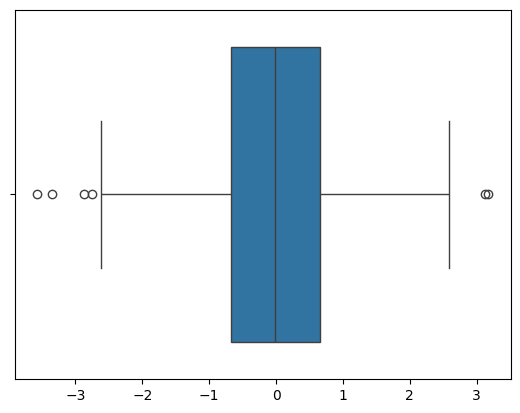

In [77]:
sns.boxplot(x = data)

### IQR Technique (Univariate)

In [111]:
q1 = df['x'].quantile(0.25)
q3 = df['x'].quantile(0.75)

iqr = q3 - q1
max_val = q3 + 1.5 * iqr
min_val = q1 - 1.5 * iqr

In [112]:
print(f'actual max: {df["x"].max()}')
print(f'actual min: {df["x"].min()}')
print(f'box plot max value: {max_val}')
print(f'box plot min value: {min_val}')

actual max: 18.091
actual min: 0.47
box plot max value: 28.273000000000003
box plot min value: -7.695000000000001


[0.66379783 3.44340529 1.1571642  1.78112343 0.81321711 1.52286801
 1.3326842  1.19212318 0.75911315 0.84478252]


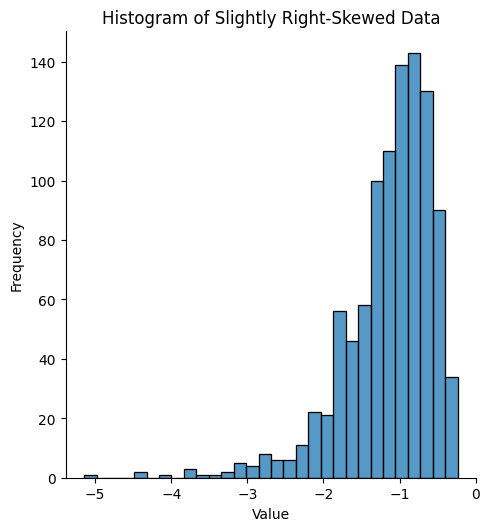

In [120]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the log-normal distribution
mean = 0     # Mean of the underlying normal distribution
sigma = 0.5  # Standard deviation of the underlying normal distribution
num_samples = 1000  # Number of data points

# Generate the slightly right-skewed dataset
data = np.random.lognormal(mean=mean, sigma=sigma, size=num_samples)

# Print the first few data points
print(data[:10])

# Plot a histogram of the generated data
sns.displot(-data, bins=30)
plt.title('Histogram of Slightly Right-Skewed Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
